<a href="https://colab.research.google.com/github/IheebM/HQ/blob/master/CodeWars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import subprocess,shlex,sys,glob,functools,math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import scipy.integrate 
import random
import matplotlib.pylab as pylab

In [4]:
%load_ext google.colab.data_table
%load_ext tensorboard

In [5]:
#@title Python test framework master { display-mode: "form" }
#@title
from __future__ import print_function
def expect(passed=None, message=None, allow_raise=False):
    if passed:
        display('PASSED', 'Test Passed')
    else:
        message = message or "Value is not what was expected"
        display('FAILED', message)
        if allow_raise:
            raise AssertException(message)

class test():
  class AssertException(Exception):
      pass


  def format_message(message):
      return message.replace("\n", "<:LF:>")


  def display(type, message, label="", mode=""):
      print("\n<{0}:{1}:{2}>{3}".format(
          type.upper(), mode.upper(), label, format_message(message)))


  def assert_equals(actual, expected, message=None, allow_raise=False):
      equals_msg = "{0} should equal {1}".format(repr(actual), repr(expected))
      if message is None:
          message = equals_msg
      else:
          message += ": " + equals_msg
      expect(actual == expected, message, allow_raise)


  def assert_not_equals(actual, expected, message=None, allow_raise=False):
      r_actual, r_expected = repr(actual), repr(expected)
      equals_msg = "{0} should not equal {1}".format(r_actual, r_expected)
      if message is None:
          message = equals_msg
      else:
          message += ": " + equals_msg

      expect(not (actual == expected), message, allow_raise)


  def expect_error(message, function, exception=Exception):
      passed = False
      try:
          function()
      except exception:
          passed = True
      except Exception as e:
          message = "{}: {} should be {}".format(message or "Unexpected exception", repr(e), repr(exception))
      expect(passed, message)


  def expect_no_error(message, function, exception=BaseException):
      try:
          function()
      except exception as e:
          fail("{}: {}".format(message or "Unexpected exception", repr(e)))
          return
      except:
          pass
      pass_()


  def pass_(): expect(True)


  def fail(message): expect(False, message)


  def assert_approx_equals(
          actual, expected, margin=1e-9, message=None, allow_raise=False):
      msg = "{0} should be close to {1} with absolute or relative margin of {2}"
      equals_msg = msg.format(repr(actual), repr(expected), repr(margin))
      if message is None:
          message = equals_msg
      else:
          message += ": " + equals_msg
      div = max(abs(actual), abs(expected), 1)
      expect(abs((actual - expected) / div) < margin, message, allow_raise)


  '''
  Usage:
  @describe('describe text')
  def describe1():
      @it('it text')
      def it1():
          # some test cases...
  '''


  def _timed_block_factory(opening_text):
      from timeit import default_timer as timer
      from traceback import format_exception
      from sys import exc_info

      def _timed_block_decorator(s, before=None, after=None):
          display(opening_text, s)

          def wrapper(func):
              if callable(before):
                  before()
              time = timer()
              try:
                  func()
              except AssertionError as e:
                  display('FAILED', str(e))
              except Exception:
                  fail('Unexpected exception raised')
                  tb_str = ''.join(format_exception(*exc_info()))
                  display('ERROR', tb_str)
              display('COMPLETEDIN', '{:.2f}'.format((timer() - time) * 1000))
              if callable(after):
                  after()
          return wrapper
      return _timed_block_decorator


  describe = _timed_block_factory('DESCRIBE')
  it = _timed_block_factory('IT')


  '''
  Timeout utility
  Usage:
  @timeout(sec)
  def some_t

      any code block...
  Note: Timeout value can be a float.
  '''


  def timeout(sec):
      def wrapper(func):
          from multiprocessing import Process
          msg = 'Should not throw any exceptions inside timeout'

          def wrapped():
              expect_no_error(msg, func)
          process = Process(target=wrapped)
          process.start()
          process.join(sec)
          if process.is_alive():
              fail('Exceeded time limit of {:.3f} seconds'.format(sec))
              process.terminate()
              process.join()
      return wrapper


In [6]:
import time
def running_time(fun,*argv):
  start_time = time.time()
  print(fun(*argv),"--- %s seconds ---" % (time.time() - start_time))

# **QM simulations**

Bound states solutions for a finite square well potential

V(x)=-V0 if |x|<a, else 0 

V0,a>0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide


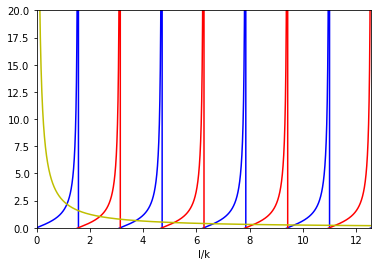

In [76]:

# v0=int(input("V0="))
# a=int(input("a="))
v0 = 80  #@param {type: "slider", min: 0, max: 1000}
#E = 164  #@param {type: "slider", min: 100, max: 100}
a = 10  #@param {type: "slider", min: 0, max: 200}
E=-v0/2

scale=34
h_=6.62*10**(-34+scale)
m=1.67*10**(-27+scale)
k=np.sqrt(2*m*E)/h_
l=np.sqrt(2*m*(E+v0))/h_
z=l*a
z0=np.sqrt(2*m*v0*a**2/h_**2)
f=lambda x:np.sqrt(z0**2/x**2-1)*10E-6


x=np.arange(0,4*math.pi,math.pi/4000)
plt.xlabel("l/k")
plt.xlim(0,4*np.pi)
plt.ylim(0,20)

plt.plot(x,np.tan(x),"b")
plt.plot(x,-1/np.tan(x),"r")
plt.plot(x,f(x),"y")

# **Sort list without using list.sort**

In [ ]:
def bubbleSort(t):
    i,sorted=0,False
    while (i<len(t)-1 and not sorted):
        sorted,j=True,0
        while (j<len(t)-i-1):
            if (t[j]>t[j+1]):
                t[j],t[j+1]=t[j+1],t[j]
                sorted=False
            j+=1
        i+=1
    return t
####################################################################################################################################################################################################################################################
def combSort(t):
    gap,sorted=len(t)-1,False
    while(not sorted):
        gap=int(gap/1.3)
        if(gap<=1):
            gap,sorted=int(max(gap,1)),True
        j=0
        while(j<len(t)-gap):
            if (t[j]>t[j+gap]):
                t[j],t[j+gap]=t[j+gap],t[j]
                sorted=False
            j+=1
    return t

####################################################################################################################################################################################################################################################
def partition(array, start, end):
    pivot = array[start]
    low = start + 1
    high = end
    while True:
        while low <= high and array[high] >= pivot:
            high = high - 1
        while low <= high and array[low] <= pivot:
            low = low + 1
        if low <= high:
            array[low], array[high] = array[high], array[low]
        else:
            break
    array[start], array[high] = array[high], array[start]
    return high
def quick_sort(array, start, end):
    if start >= end:
        return
    p = partition(array, start, end)
    quick_sort(array, start, p-1)
    quick_sort(array, p+1, end)

**Replace With Alphabet Position**

Given a string, replace every letter with its position in the alphabet. (ignore non alphabetic characters)

In [ ]:
# def alphabet_position1(text):
#     print(functools.reduce(lambda x,y:x+' '+str(ord(y.lower())-96), list(text)))
def alphabet_position(text):
    text=text.lower()
    if (len(text)>1):
        return alphabet_position(text[:-1:])+' '+str(ord(text[-1])-96) if (text[-1]).isalpha() else alphabet_position(text[:-1:])
    else :
        return str(ord(text[-1])-96) if (text[-1]).isalpha() else ''

In [ ]:
#@title Sample Tests { display-mode: "form" }
from random import randint
test.assert_equals(alphabet_position("The sunset sets at twelve o' clock."), "20 8 5 19 21 14 19 5 20 19 5 20 19 1 20 20 23 5 12 22 5 15 3 12 15 3 11")
test.assert_equals(alphabet_position("The narwhal bacons at midnight."), "20 8 5 14 1 18 23 8 1 12 2 1 3 15 14 19 1 20 13 9 4 14 9 7 8 20")

number_test = ""
for item in range(10):
    number_test += str(randint(1, 9))
test.assert_equals(alphabet_position(number_test), "")

**Find The Parity Outlier**

You are given an array (which will have a length of at least 3, but could be very large) containing integers. The array is either entirely comprised of odd integers or entirely comprised of even integers except for a single integer N. Write a method that takes the array as an argument and returns this "outlier" N.

In [ ]:
def find_outlier(integers):
    mod2=lambda x:x%2
    regular=np.where(mod2(integers[0])+mod2(integers[1])+mod2(integers[2])<2,0,1)
    i=0
    while ((integers[i])%2==regular):
        i+=1
    return integers[i]

In [ ]:
#@title Sample Tests { display-mode: "form" }
test.assert_equals(find_outlier([2, 4, 6, 8, 10, 3]), 3)
test.assert_equals(find_outlier([2, 4, 0, 100, 4, 11, 2602, 36]), 11)
test.assert_equals(find_outlier([160, 3, 1719, 19, 11, 13, -21]), 160)

**Pig Latin**

Move the first letter of each word to the end of it, then add "ay" to the end of the word. Leave punctuation marks untouched.

In [ ]:
def pig_it(text):
  return  " ".join(i[1::]+i[0]+"ay" if i.isalpha() else i for i in list(text.split(' ')))  

In [ ]:
#@title Sample Tests { display-mode: "form" }
test.assert_equals(pig_it('Pig latin is cool'),'igPay atinlay siay oolcay')
test.assert_equals(pig_it('This is my string'),'hisTay siay ymay tringsay')

**Is a number prime?**

Define a function that takes one integer argument(positive or negative) and returns logical value true or false depending on if the integer is a prime.

In [ ]:
def is_prime(num):
    if (num<2 or num%2==0):
        return False or num==2
    for i in range(3,np.int(np.sqrt(np.float(num)))+1,2): # Explicit float casting to handle large numbers 
        if (num%i==0):
            return False
    return True

In [ ]:
largeNotPrime=238962445015
Product2LargePrime=8843789*1099859

running_time(is_prime,largePrime)
running_time(is_prime,largeNotPrime)
running_time(is_prime,Product2LargePrime)

True --- 0.041315555572509766 seconds ---
False --- 3.8623809814453125e-05 seconds ---
False --- 0.07434391975402832 seconds ---


In [ ]:
import random

def even_odd(n):
    s, d = 0, n
    while d % 2 == 0:
          s += 1
          d >>= 1
    return s, d

def Miller_Rabin(a, p):
    s, d = even_odd(p-1)
    a = pow(a, d, p)
    if a == 1: return True
    for i in range(s):
        if a == p-1: return True
        a = pow(a, 2, p)
    return False

def is_prime_Miller_Rabin(p):
    if p == 2: return True
    if p <= 1 or p % 2 == 0: return False
    return all(Miller_Rabin(random.randint(2,p-1),p) for _ in range(40))
is_prime_Miller_Rabin(7193460161740708249)

In [ ]:
#@title Sample Tests { display-mode: "form" }
@test.it("Basic tests")
def basic_tests():
    test.assert_equals(is_prime(0),  False, "0  is not prime")
    test.assert_equals(is_prime(1),  False, "1  is not prime")
    test.assert_equals(is_prime(2),  True, "2  is prime")
    test.assert_equals(is_prime(73), True, "73 is prime")
    test.assert_equals(is_prime(75), False, "75 is not prime")
    test.assert_equals(is_prime(-1), False, "-1 is not prime")


@test.it("Test prime")
def test_prime():
    test.assert_equals(is_prime(3),  True, "3  is prime");
    test.assert_equals(is_prime(5),  True, "5  is prime");
    test.assert_equals(is_prime(7),  True, "7  is prime");
    test.assert_equals(is_prime(41), True, "41 is prime");
    test.assert_equals(is_prime(5099), True, "5099 is prime");
    
@test.it("Test not prime")
def test_not_prime():
    test.assert_equals(is_prime(4),  False, "4  is not prime");
    test.assert_equals(is_prime(6),  False, "6  is not prime");
    test.assert_equals(is_prime(8),  False, "8  is not prime");
    test.assert_equals(is_prime(9), False, "9 is not prime");
    test.assert_equals(is_prime(45), False, "45 is not prime");
    test.assert_equals(is_prime(-5), False, "-5 is not prime");
    test.assert_equals(is_prime(-8), False, "-8 is not prime");
    test.assert_equals(is_prime(-41), False, "-41 is not prime");

# **The GCF (Greatest Common Factor) of any two numbers**

In [ ]:
def find_GCF(n1,n2):
  return find_GCF(min(n1,n2),max(n1,n2)-min(n1,n2)) if n1!=n2 else n1
def find_GCF(a, b):
    return find_GCF(b,a%b) if b else a

In [ ]:
#@title Sample Tests { vertical-output: true }
test.assert_equals(find_GCF(2, 4), 2)
test.assert_equals(find_GCF(8,20), 4);
test.assert_equals(find_GCF(5,13), 1);
test.assert_equals(find_GCF(100,100), 100);

# **Get the numbers from given GCD sum**
Given the sum and gcd of two numbers, return those two numbers in ascending order.

In [ ]:
def find_GCF(a, b):
    return find_GCF(b,a%b) if b else a

def solve(sum,gcf,index=0):
    return solve(sum-1,gcf,index+1) if (find_GCF(sum,index)!=gcf and index<=sum) else ((index,sum) if index<=sum else -1)

def solve1(sum,gcf):
    i=1
    while(find_GCF(sum-i,i)!=gcf and i<=sum/2):
        i+=1
    return (i,sum-i) if i<=sum/2 else -1



In [ ]:
#@title Sample Tests { vertical-output: true }
test.assert_equals(solve(6,3), (3,3))
test.assert_equals(solve(8,2), (2,6))
test.assert_equals(solve(10,3), -1)
test.assert_equals(solve(12,4), (4,8))
test.assert_equals(solve(12,5), -1)   


**Multiples of 3 or 5 below the number passed in**

If the number is negative, return 0.
If the number is a multiple of both 3 and 5, only count it once.

In [ ]:
def solution(number):
    return (int)(sum(np.concatenate((np.arange(3,number,3) , np.arange(5,number,5), -(np.arange(5,number,5)[2::3])),axis=0)))  if number>3 else 0
def solution1(number):
  return sum(x for x in range(number) if not (x%3 and x%5))

In [ ]:
#@title Sample Tests { display-mode: "form" }

test.assert_equals(solution(4), 3)


test.assert_equals(solution(6), 8)


test.assert_equals(solution(16), 60)


test.assert_equals(solution(3), 0)


test.assert_equals(solution(5), 3)


test.assert_equals(solution(15), 45)


test.assert_equals(solution(0), 0)


test.assert_equals(solution(-1), 0)


test.assert_equals(solution(10), 23)


test.assert_equals(solution(20), 78)


test.assert_equals(solution(200), 9168)


# **Calculating with Functions**

seven(times(five())) # must return 35

In [ ]:
identity=lambda a:a
number= lambda i:lambda f=identity:f(i)
zero, one, two, three, four, five, six, seven, eight, nine = map(number, range(10))
plus = lambda x: lambda y: y + x
minus = lambda x: lambda y: y - x
times = lambda x: lambda y: y * x
divided_by = lambda x: lambda y: y // x


In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }
test.describe('Basic Tests')
test.assert_equals(seven(times(five())), 35)
test.assert_equals(four(plus(nine())), 13)
test.assert_equals(eight(minus(three())), 5)
test.assert_equals(six(divided_by(two())), 3)

# **Valid Braces**

An input is a nonempty string, and it will only consist of parentheses, brackets and curly braces: ()[]{}

A string of braces is considered valid if all braces are matched with the correct brace.

In [ ]:
# First solution
def validBraces(string):
    matched = {"(": ")", "[": "]", "{": "}"}
    closing=matched.values()
    accumulated=string[0]
    for i in string:
      if ((i in closing) and matched[accumulated[-1]]!=curChr):


    accumulated,current,length=string[0],1,len(string)
    while (current<length):
        curChr=string[current]
        if :
          return False
        current+=1
        if (accumulated=="" or matched[accumulated[-1]] in matched.values()):
            accumulated+=curChr
        else:
            accumulated=accumulated[:-1]
    return accumulated==""
# Second solution
def validBraces1(string):
    braces = {"(": ")", "[": "]"}
    stack = []
    for character in string:
        if character in braces.keys():
            stack.append(character)
        else:
            if len(stack) == 0 or bractextstack.pop()] != character:
                return False
    return len(stack) == 0 
"""
tree -> child or brother
string walk
math +-
from inside 2,4,6
"""

'\ntree -> child or brother\nstring walk\nmath +-\nfrom inside 2,4,6\n'

In [ ]:
running_time(validBraces1,1000*'([])')
running_time(validBraces,1000*'([])')

In [ ]:
running_time(validBraces1,'([])')
running_time(validBraces,'([])')

running_time(validBraces1,')'+10000000000000*'([])')
running_time(validBraces,')'+100*'([])')

running_time(validBraces1,'[({})](][({})](][({})](]')
running_time(validBraces,'[({})](][({})](][({})](]')

True --- 1.1444091796875e-05 seconds ---
True --- 1.0728836059570312e-05 seconds ---
False --- 5.9604644775390625e-06 seconds ---
False --- 0.0002105236053466797 seconds ---
False --- 9.5367431640625e-06 seconds ---
False --- 1.6927719116210938e-05 seconds ---


In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }
test.assert_equals(validBraces("()"), True);
test.assert_equals(validBraces("[(])"), False);

# **Count the number of Duplicates**

A function that returns the count of distinct case-insensitive alphabetic characters and numeric digits that occur more than once in the input string. 
e.g. "indivisibility" -> 1 and "Indivisibilities" -> 2

In [ ]:
guard={'0': 0,'1': 0,'2': 0,'3': 0,'4': 0,'5': 0,'6': 0,'7': 0,'8': 0,'9': 0,'a': 0,'b': 0,'c': 0,'d': 0,'e': 0,'f': 0,'g': 0,'h': 0,'i': 0,'j': 0,'k': 0,'l': 0,'m': 0,'n': 0,'o': 0,'p': 0,'q': 0,'r': 0,'s': 0,'t': 0,'u': 0,'v': 0,'w': 0,'x': 0,'y': 0,'z': 0}
def duplicate_count1(text):
    return sum(1 for i in guard.keys() if text.lower().count(i)>1 )
def duplicate_count(text):
    for i in text.lower():
        if (guard.get(i)==None):
            pass
        elif (guard[i]==1):
            guard.pop(i) 
        else:
            guard[i]+=1
    return 36-len(guard)
'''
Two bits per letter to store its state
count(i), ∀i€{A..Z}
Dict(i:{0,1}), ∀i€{A..Z} --> Drop i when found for the second time: text with card(different letter) is high, and the letters are redundant
Dict --> Add i when found, i€{A..Z}: text with card(different letter) is low
'''

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }
@test.describe("Fixed Tests")
def fixed_tests():
    @test.it("Basic Tests")
    def basic_tests():
        test.assert_equals(duplicate_count(""), 0)
        test.assert_equals(duplicate_count("abcde"), 0)
        test.assert_equals(duplicate_count("abcdeaa"), 1)
        test.assert_equals(duplicate_count("abcdeaB"), 2)
        test.assert_equals(duplicate_count("Indivisibilities"), 2)

# **Find the odd int**

Given an array of integers, find the one that appears an odd number of times.

In [ ]:
import numpy as np
def find_it(seq):
    return next(i  for i in seq if seq.count(i)%2==1)

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }


@test.describe("Sample tests")
def sample_tests():
    
    @test.it("find_it([20,1,-1,2,-2,3,3,5,5,1,2,4,20,4,-1,-2,5]) should return 5 (because it appears 3 times)")
    def _():
        test.assert_equals(find_it([20,1,-1,2,-2,3,3,5,5,1,2,4,20,4,-1,-2,5]), 5)
        
    @test.it("find_it([1,1,2,-2,5,2,4,4,-1,-2,5]) should return -1 (because it appears 1 time)")
    def _():
        test.assert_equals(find_it([1,1,2,-2,5,2,4,4,-1,-2,5]), -1);
        
    @test.it("find_it([20,1,1,2,2,3,3,5,5,4,20,4,5]) should return 5 (because it appears 3 times)")
    def _():
        test.assert_equals(find_it([20,1,1,2,2,3,3,5,5,4,20,4,5]), 5);
        
    @test.it("find_it([10]) should return 10 (because it appears 1 time)")
    def _():
        test.assert_equals(find_it([10]), 10);

    @test.it("find_it([10, 10, 10]) should return 10 (because it appears 3 times)")
    def _():
        test.assert_equals(find_it([10, 10, 10]), 10);        
        
    @test.it("find_it([1,1,1,1,1,1,10,1,1,1,1]) should return 10 (because it appears 1 time)")
    def _():
        test.assert_equals(find_it([1,1,1,1,1,1,10,1,1,1,1]), 10);

    @test.it("find_it([5,4,3,2,1,5,4,3,2,10,10]) should return 1 (because it appears 1 time)")
    def _():
        test.assert_equals(find_it([5,4,3,2,1,5,4,3,2,10,10]), 1);

# **JavaScript Array Filter**

In [ ]:
def get_even_numbers(arr):
    return [i for i in arr if i%2==0]

def get_even_numbers(arr):
    return list(filter(lambda x:(x+1)%2,arr))

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }
@test.describe("Fixed Tests")
def fixed_tests():
    @test.it('Basic Test Cases')
    def basic_test_cases():
        test.assert_equals(get_even_numbers([2,4,5,6]), [2,4,6], "Returned list is incorrect")
        test.assert_equals(get_even_numbers([]), [], "Returned list is incorrect")
        test.assert_equals(get_even_numbers([1]), [], "Returned list is incorrect")
        test.assert_equals(get_even_numbers([1,2]), [2], "Returned list is incorrect")
        test.assert_equals(get_even_numbers([1,2,3,4,5]), [2,4], "Returned list is incorrect")
        test.assert_equals(get_even_numbers([2,4,6,8]), [2,4,6,8], "Returned list is incorrect")

# **Stanton measure**

Count the number of 1s in the array. Let this count be n. The Stanton measure is the number of times that n appears in the array.

In [ ]:
import numpy as np
def stanton_measure(arr):
    return arr.count(arr.count(1))

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }
test.assert_equals(stanton_measure([1, 4, 3, 2, 1, 2, 3, 2]), 2)

# **Chicken Sexing**

Bob is a chicken sexer.
All of Bob's decisions will be checked against an expert's choices to generate a correctness score.

Scoring Rules
When they agree, he gets 1 point.
When they disagree but one has said '?' (can't guess), he gets 0.5 points.
When they disagree completely, he gets 0 points.

In [ ]:
def correctness(bobs_decisions, expert_decisions):   
    return sum([1 if bob_d==expert_d else 0.5*int(bob_d=="?" or expert_d=="?") for bob_d,expert_d in zip(bobs_decisions, expert_decisions)])

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }
test.assert_equals(correctness(('M', 'F', '?'), ('M', 'F', '?')), 3)
test.assert_equals(correctness(('M', '?', 'M'), ('M', 'F', '?')), 2)
test.assert_equals(correctness(('F', 'M', 'F'), ('M', 'F', 'M')), 0)

# **Meeting**

s = "Fred:Corwill;Wilfred:Corwill;Barney:Tornbull;Betty:Tornbull;Bjon:Tornbull;Raphael:Corwill;Alfred:Corwill";

The program makes this string uppercase and sorts it in alphabetical order by last name. When the last names are the same, sort them by first name.

meeting(s)

"(CORWILL, ALFRED)(CORWILL, FRED)(CORWILL, RAPHAEL)(CORWILL, WILFRED)(TORNBULL, BARNEY)(TORNBULL, BETTY)(TORNBULL, BJON)"


In [ ]:
import numpy as np
def meeting(s):
    attendee_list = np.array([((i[i.index(":")+1:]).upper(),(i[:i.index(":")]).upper()) for  i in s.split(';')], dtype=[('last_name','U100'),('first_name','U100')])
    l=np.sort(attendee_list,order=['last_name','first_name'])
    return ("".join(i for i in list(filter(lambda x:x not in ('\'','\n','[',']') ,str(l))))).replace(") (",")(")

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }
def testing(s, exp):
    print("Testing:\n" + s)
    ans = meeting(s)
    print("ACTUAL =\n%s" % (ans))
    print("EXPECT =\n%s" % (exp))
    print(ans == exp)
    test.assert_equals(ans, exp)

test.describe("meeting")
test.it("Basic tests")
def tests():
    testing("Alexis:Wahl;John:Bell;Victoria:Schwarz;Abba:Dorny;Grace:Meta;Ann:Arno;Madison:STAN;Alex:Cornwell;Lewis:Kern;Megan:Stan;Alex:Korn", 
            "(ARNO, ANN)(BELL, JOHN)(CORNWELL, ALEX)(DORNY, ABBA)(KERN, LEWIS)(KORN, ALEX)(META, GRACE)(SCHWARZ, VICTORIA)(STAN, MADISON)(STAN, MEGAN)(WAHL, ALEXIS)")
    testing("John:Gates;Michael:Wahl;Megan:Bell;Paul:Dorries;James:Dorny;Lewis:Steve;Alex:Meta;Elizabeth:Russel;Anna:Korn;Ann:Kern;Amber:Cornwell", 
        "(BELL, MEGAN)(CORNWELL, AMBER)(DORNY, JAMES)(DORRIES, PAUL)(GATES, JOHN)(KERN, ANN)(KORN, ANNA)(META, ALEX)(RUSSEL, ELIZABETH)(STEVE, LEWIS)(WAHL, MICHAEL)")
    testing("Alex:Arno;Alissa:Cornwell;Sarah:Bell;Andrew:Dorries;Ann:Kern;Haley:Arno;Paul:Dorny;Madison:Kern", 
        "(ARNO, ALEX)(ARNO, HALEY)(BELL, SARAH)(CORNWELL, ALISSA)(DORNY, PAUL)(DORRIES, ANDREW)(KERN, ANN)(KERN, MADISON)")

tests()
print("<COMPLETEDIN::>")
print("<COMPLETEDIN::>")

# **Alphabetical Grid**
Grid returns an alphabetical grid of size NxN, where a = 0, b = 1, c = 2...
After "z" comes "a"

grid(4)
```
a b c d
b c d e
c d e f
d e f g

```



In [ ]:
def grid(N):
    return None if N<0 else  "\n".join(" ".join(chr(97+i%26) for i in range(j,N+j)) for j in range(N))

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }

test.assert_equals(grid(0), '')
test.assert_equals(grid(1), 'a')
test.assert_equals(grid(2), 'a b\nb c')
test.assert_equals(grid(4), 'a b c d\nb c d e\nc d e f\nd e f g')
test.assert_equals(grid(6), 'a b c d e f\nb c d e f g\nc d e f g h\nd e f g h i\ne f g h i j\nf g h i j k')

test.assert_equals(grid(-1), None)
test.assert_equals(grid(-5), None)

# **Design an Automaton (Finite State Machine)**
q1 is our start state, we begin reading commands from here

q2 is our accept state, we return true if this is our last state

*   q1 moves to q2 when given a 1, and stays at q1 when given a 0

*   q2 moves to q3 when given a 0, and stays at q2 when given a 1

*   q3 moves to q2 when given a 0 or 1



In [ ]:
class Automaton(object):

    def __init__(self):
        self.states = []
    
    def q2_strikes_back(self,s):
        if len(s)==1: return True
        if len(s)==0: return False    
        transition2q3=s.find('0')+1
        return self.q2_strikes_back(s[transition2q3:]) 
    
    def read_commands(self, commands):
        cmd="".join(i for i in commands)
        transition2q2=cmd.find('1')+1                      # In case "1" is the first char, the result is False => +1  
        transition2q3=cmd.find('0',transition2q2)+1    # A zero modulo 2 is True whereas it is False for python => no -1

        return  bool(transition2q2 and not (transition2q3)) or bool(transition2q2*transition2q3 and self.q2_strikes_back(cmd[transition2q3:]))
my_automaton = Automaton()

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }

test.assert_equals(my_automaton.read_commands(["1"]), True)
test.assert_equals(my_automaton.read_commands(["1", "0", "0", "1"]), True)

# **The observed PIN**

Input: observed PIN with a length of 1 to 8 digits.

Each of the digits could actually be another adjacent digit (horizontally or vertically, but not diagonally)

Output: all possible PINs

The keypad has the following layout:
```
┌───┬───┬───┐
│ 1 │ 2 │ 3 │
├───┼───┼───┤
│ 4 │ 5 │ 6 │
├───┼───┼───┤
│ 7 │ 8 │ 9 │
└───┼───┼───┘
    │ 0 │
    └───┘
```


In [ ]:
variations={'0': ['0', '8'],'1': ['1', '2', '4'],'2': ['2', '1', '3', '5'],'3': ['3', '2', '6'],'4': ['4', '5', '1', '7'],'5': ['5', '4', '6', '2', '8'], '6': ['6', '5', '3', '9'],'7': ['7', '8', '4'],'8': ['8', '7', '9', '5', '0'],'9': ['9', '8', '6']}
combine=lambda l1,l2:list((" ".join(i+j for i in l1 for j in l2)).split(" "))
def get_pins(observed):
    if(len(observed)==1):
        return variations[(observed[0])]
    else :
        return combine(variations[(observed[0])],get_pins(observed[1:]))
# def variations_generator(l):
#     variations={"0":["0","8"]}
#     for i in range(len(l)-1):
#         for j in range(len(l[i])):
#             values=[l[i][j]]
#             if ((j-1)>=0):  
#                 values.append(l[i][j-1])
#             if (j<(len(l[i])-1)):  
#                 values.append(l[i][j+1])
#             if ((i-1)>=0 and j<len(l[i-1])):  
#                 values.append(l[i-1][j])
#             if ((i+1)<len(l) and j<len(l[i+1]) and l[i+1][j]!=None):  
#                 values.append(l[i+1][j])     
#             variations.update({l[i][j]:values})
#     return variations
# l=[["1","2","3"],["4","5","6"],["7","8","9"],[None,"0"]]
# variations=variations_generator(l) 

In [ ]:
from itertools import product

ADJACENTS = ('08', '124', '2135', '326', '4157', '52468', '6359', '748', '85790', '968')

def get_pins(observed):
    return [''.join(p) for p in product(*(ADJACENTS[int(d)] for d in observed))]

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }
test.describe('example tests')
expectations = [('8', ['5','7','8','9','0']),
                ('11',["11", "22", "44", "12", "21", "14", "41", "24", "42"]),
                ('369', ["339","366","399","658","636","258","268","669","668","266","369","398","256","296","259","368","638","396","238","356","659","639","666","359","336","299","338","696","269","358","656","698","699","298","236","239"])]

for tup in expectations:
    test.assert_equals(sorted(get_pins(tup[0])), sorted(tup[1]), 'PIN: ' + tup[0])


# **Pick peaks**
A function that returns the positions and the values of the "peaks" (or local maxima) of a numeric array. {pos: [], peaks: []}

The first and last elements of the array will not be considered as peaks 

In case of a plateau-peak, only return the position and value of the beginning of the plateau.

In [ ]:
def pick_peaks(arr):
    peaks={'pos': [], 'peaks': []}
    i=1
    while (i<len(arr)-1):
        startingIndex=i
        while (i<len(arr)-2 and arr[i]==arr[i+1]):i+=1
        if (arr[i]>arr[startingIndex-1] and arr[i]>arr[i+1]) :
            (peaks['pos']).append(startingIndex)
            (peaks['peaks']).append(arr[startingIndex])
        i+=1
    return peaks



In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }
test.assert_equals(pick_peaks([1,2,3,6,4,1,2,3,2,1]), {"pos":[3,7], "peaks":[6,3]})
test.assert_equals(pick_peaks([3,2,3,6,4,1,2,3,2,1,2,3]), {"pos":[3,7], "peaks":[6,3]})
test.assert_equals(pick_peaks([3,2,3,6,4,1,2,3,2,1,2,2,2,1]), {"pos":[3,7,10], "peaks":[6,3,2]})
test.assert_equals(pick_peaks([2,1,3,1,2,2,2,2,1]), {"pos":[2,4], "peaks":[3,2]})
test.assert_equals(pick_peaks([2,1,3,1,2,2,2,2]), {"pos":[2], "peaks":[3]})
test.assert_equals(pick_peaks([2,1,3,2,2,2,2,5,6]), {"pos":[2], "peaks":[3]})
test.assert_equals(pick_peaks([2,1,3,2,2,2,2,1]), {"pos":[2], "peaks":[3]})
test.assert_equals(pick_peaks([1,2,5,4,3,2,3,6,4,1,2,3,3,4,5,3,2,1,2,3,5,5,4,3]), {"pos":[2,7,14,20], "peaks":[5,6,5,5]})
test.assert_equals(pick_peaks([]),{"pos":[],"peaks":[]})
test.assert_equals(pick_peaks([1,1,1,1]),{"pos":[],"peaks":[]})

# **A Chain adding function**

A function that will add numbers together when called in succession

add(1)(2)(3)(4)(5); // 15

In [ ]:
class add(int):
    def __call__(self,n):
        return add(self+n)
# def add(x=0,cnt=0,opcnt=0):
#       return lambda y: add(x+y,cnt+1) if cnt<opcnt else x

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }
test.assert_equals(add(1), 1)
test.assert_equals(add(1)(2), 3)
test.assert_equals(add(1)(2)(3), 6)

# **Pete, the baker**

how many cakes could be baked with a certain recipe? 
Input: an object recipe and n object available ingredients

In [ ]:
def cakes(recipe, available):
    return min (available.get(key,0) // value for key,value in recipe.items() )

def cakes1(recipe, available):
    if not ( recipe.keys() <= available.keys() ):
        return 0
    lastkey,lastvalue=recipe.popitem()
    count=available[lastkey] // lastvalue 
    for key,value in recipe.items():
        if ((available[key] / value) < count) : 
            count=(available[key] // value)
    return count

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }

recipe = {"flour": 500, "sugar": 200, "eggs": 1}
available = {"flour": 1200, "sugar": 1200, "eggs": 5, "milk": 200}
test.assert_equals(cakes(recipe, available), 2, 'example #1')

recipe = {"apples": 3, "flour": 300, "sugar": 150, "milk": 100, "oil": 100}
available = {"sugar": 500, "flour": 2000, "milk": 2000}
test.assert_equals(cakes(recipe, available), 0, 'example #2')

# **Pete, the baker (part 2)**
Pete is now mixing the cake mixture. He also might have added some of the ingredients already, but something is missing. Can you help him to find out?
Pete only wants to bake whole cakes. And ingredients, that were added once to the mixture, can't be removed from that.
If Pete already added all ingredients for an integer amount of cakes, return an empty hash.
If Pete didn't add any ingredients at all, you need to add all ingredients for exactly one cake.

In [ ]:
import numpy as np
import itertools 

def get_missing_ingredients(recipe, added):

    m=max(itertools.chain((np.ceil(added[i]/recipe[i]) for i in added.keys() if i in recipe.keys()),{1}) )
    return {i:m*recipe[i] if (i not in added.keys()) else recipe[i]-np.floor(added[i]%recipe[i])+(m-np.floor(added[i]/recipe[i])-1)*recipe[i] for i in recipe.keys() if (i not in added) or ((i in added) and ((added[i]%recipe[i]!=0) or (np.ceil(added[i]/recipe[i])!=m)))  }

'''
Get the cakes order count "m"

itertools.chain(...{1}) in case none of the required ingredients are added
"If Pete didn't add any ingredients at all, you need to add all ingredients for exactly one cake."

If an ingredient is already there -> 
add an amount so that it is enough for his latest cake 
add "m" minus the count of the already added required amounts

If an ingredient isn't, already, added -> 
add "m" of its required amount

'''
def get_missing_ingredients(recipe, added):
    m=max(itertools.chain((np.ceil(added[i]/recipe[i]) for i in added.keys() if i in recipe.keys()),{1}) )

    missing={}
    for i in recipe.keys() :
        if (i in added.keys()) :           
            x=recipe[i]-np.floor(added[i]%recipe[i])+(m-np.floor(added[i]/recipe[i])-1)*recipe[i]
            if (x!=0):
                missing[i]=x
                
        else :
            missing[i]=m*recipe[i]  
    return missing


In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }
# -*- coding: utf-8 -*-
recipe = {"flour": 200, "eggs": 1, "sugar": 100}
print('should return missing ingredients, when something is missing for 1 cake')
test.assert_equals(get_missing_ingredients(recipe, {"flour": 100}), {"flour": 100, "eggs": 1, "sugar": 100})
test.assert_equals(get_missing_ingredients(recipe, {"flour": 200, "sugar": 100}), {"eggs": 1})
  
print('should return no missing ingredients, when enough was added for integer amount of cakes')
test.assert_equals(get_missing_ingredients(recipe, {"flour": 200, "eggs": 1, "sugar": 100}), {})
test.assert_equals(get_missing_ingredients(recipe, {"flour": 400, "eggs": 2, "sugar": 200}), {})
test.assert_equals(get_missing_ingredients(recipe, {"flour": 1000, "eggs": 5, "sugar": 500}), {})
  
recipe = {"flour": 200, "eggs": 1, "sugar": 100}
print('should return missing ingredients, when something is missing for 1 cake')
test.assert_equals(get_missing_ingredients(recipe, {"flour": 100}), {"flour": 100, "eggs": 1, "sugar": 100})
test.assert_equals(get_missing_ingredients(recipe, {"flour": 200, "sugar": 100}), {"eggs": 1})
  
print('should return no missing ingredients, when enough was added for integer amount of cakes')
test.assert_equals(get_missing_ingredients(recipe, {"flour": 200, "eggs": 1, "sugar": 100}), {})
test.assert_equals(get_missing_ingredients(recipe, {"flour": 400, "eggs": 2, "sugar": 200}), {})
test.assert_equals(get_missing_ingredients(recipe, {"flour": 1000, "eggs": 5, "sugar": 500}), {})
  
print('should return no missing ingredients for next integer amount of cakes')
test.assert_equals(get_missing_ingredients(recipe, {"flour": 199, "eggs": 1, "sugar": 100}), {"flour": 1})
test.assert_equals(get_missing_ingredients(recipe, {"flour": 1, "eggs": 2, "sugar": 200}), {"flour": 399})
test.assert_equals(get_missing_ingredients(recipe, {"flour": 123, "eggs": 70}), {"flour": 13877, "sugar": 7000})
print('should return no missing ingredients for next integer amount of cakes')
test.assert_equals(get_missing_ingredients(recipe, {"flour": 199, "eggs": 1, "sugar": 100}), {"flour": 1})
test.assert_equals(get_missing_ingredients(recipe, {"flour": 1, "eggs": 2, "sugar": 200}), {"flour": 399})
test.assert_equals(get_missing_ingredients(recipe, {"flour": 123, "eggs": 70}), {"flour": 13877, "sugar": 7000})

# **Roman Numerals Helper**

Create a RomanNumerals class that can convert a roman numeral to and from an integer value

I	1
IV 4
V	5
X	10
L	50
C	100
D	500
M	1000

Modern Roman numerals are written by expressing each digit separately starting with the left most digit and skipping any digit with a value of zero. In Roman numerals 1990 is rendered: 1000=M, 900=CM, 90=XC; resulting in MCMXC. 2008 is written as 2000=MM, 8=VIII; or MMVIII. 1666 uses each Roman symbol in descending order: MDCLXVI


In [ ]:
class RomanNumerals:

    def to_roman(val):
        return ''

    def from_roman(roman_num):
        return 0

In [ ]:
conversionT={'I':1, 'V':5,'X':10, 'L':50, 'C':100, 'D':500, 'M':1000}
class RomanNumerals:
    def to_roman(val):
        roman=''
        for i in [1,10,100,1000] :
            under_microscope=(val%(i*10))//i
            if not under_microscope:
              pass
            elif under_microscope==4 or under_microscope==9:
              roman+=conversionT[i]+conversionT[i*(under_microscope+1)]
            else :
              roman+=conversionT[i]*(under_microscope%5)+conversionT.get(conversionT[i],"")
        return roman


In [ ]:
https://www.codewars.com/kata/51b66044bce5799a7f000003/train/python

# **Permutations**
Create all permutations of an input string and remove duplicates, if present. 

In [ ]:
import itertools
import numpy as np

def permutations(string):
    return np.unique( list(''.join(i) for i in itertools.permutations(string)) )
####################################################################################################################################################################################

def permutations(L):
    N = len(L)
    idx = [0 for i in range(N)]
    result = [L]
    i = 1
    while i < N:
        if idx[i] < i:
            L = list(L)
            swap = i % 2 * idx[i]
            L[swap], L[i] = L[i], L[swap]
            result.append(L)
            idx[i] += 1
            i = 1
        else:
            idx[i] = 0
            i += 1
    return result
##########################################################################################
def permutations(s):
    if len(s) == 0:
        return []
    elif len(s) == 1:
        return [s]
    else:
        return set(s[i]+p for i in range(len(s)) for p in permutations(s[:i] + s[i+1:]))
"""
k! premières permutations ne change pas les n-k derniers elements
"""

"""
def fact(n):
  return n*fact(n-1) if n else 1


def permut_i(c,output,length,pos):#pos=pos%length  - modification position pour creer un non pattern
    m=-1
    for i in range(length):    
        for j in range(fact(length-1)):
            pos+=1
            if (pos>=length):
                pos=0 
            m+=1
            print(m,pos)
            output[m][pos]=c 
            output[m+length][pos]=c
def permutations(string):
    length=len(string)
    input=list(string)
    output=np.zeros((fact(length),length),dtype=str)
    for pos,c in enumerate(string):
        permut_i(c,output,length,pos-1)
    return output
"""

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }
test.assert_equals(sorted(permutations('a')), ['a']);
test.assert_equals(sorted(permutations('ab')), ['ab', 'ba'])
test.assert_equals(sorted(permutations('aabb')), ['aabb', 'abab', 'abba', 'baab', 'baba', 'bbaa'])

# **Strip Comments**

Complete the solution so that it strips all text that follows any of a set of comment markers passed in. Any whitespace at the end of the line should also be stripped out.

In [ ]:
def solution(string,markers):
    return "\n".join((line[:min([line.find(i) for i in markers if line.find(i)>=0 ]+[len(line)])]).strip(' ')  for line in list(string.split('\n')))

# def solution(string,markers):
#     ch,previous,nextstart="",0,0
#     markers="".join(i*string.count(i) for i in markers)
#     for i in markers:
#           index=string.find(i,previous)
#           ch+=(string[nextstart:index]).strip(" ")
#           nextstart=string.find("\n",index)
#           previous=index+1
#     return ch

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }
# -*- coding: utf-8 -*-
test.assert_equals(solution("apples, pears # and bananas\ngrapes\nbananas !apples", ["#", "!"]), "apples, pears\ngrapes\nbananas")
test.assert_equals(solution("a #b\nc\nd $e f g", ["#", "$"]), "a\nc\nd")

# **Web Scraping and Optimization for REALTY INVESTING** 

In [ ]:
# %%sh
# pip install selenium 
# pip install webdriver-manager
# pip install cloudscraper

import html5lib, lxml, requests , re, cloudscraper, os, csv, time, sys, random
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from time import sleep
import os,sys,shlex,subprocess,argparse,time,pandas
from numpy.random import randint
from socket import timeout


url = "https://www.logic-immo.com/vente-immobilier-0,1_0/options/groupprptypesids=1"

driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get(url)
sleep(20)
p_element = driver.find_element_by_id(id_="add-to-selection")
print(p_element)

scraper = cloudscraper.create_scraper()
source= scraper.get(url).text

#source=requests.get("https://scrapeme.live/shop/").text

extacted_data='extacted_data.csv'
header=np.where(os.path.exists(extacted_data),0,1)
with open(extacted_data, 'a', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # Other available data: energy_letter, client_type, client_id, position, media
    #writer.writerow(['list_name','position','price','estate_type','distribution_type','space','id','id_solo','client_id','photos_nb','estate_postalcode','client_postalcode','country','client_type','parent_site','floor_nb','nb_rooms','nb_bedrooms','energy_letter','product_status','media','product_type']) if header else None
    writer.writerow(['price','estate_type','distribution_type','space','id_solo','photos_nb','floor_nb','nb_rooms','nb_bedrooms','estate_postalcode','url2post','region']) if header else None
    hourlylimit_supervisor=0
    for code_region in range(5,24):
        page=0
        time.sleep(10)
        
        annonces=[-1] 
        while(annonces!=[]):

            # to avoid being blocked and having to solve captcha            
            # if (hourlylimit_supervisor>390):
            #   hourlylimit_supervisor=0
            #   sleep(7200)


            # random clicks to avoid a detection of a crawling pattern
            

            random_url = f"https://www.logic-immo.com/vente-immobilier-0,{random.randint(1,23)}_0/options/groupprptypesids={random.randint(1,23)}/page={random.randint(1,23)}"
            requests.get(random_url).text

            # to be gentle with the site and to emulate a human behavior
            time.sleep(15) 

            page+=1
            url = f"https://www.logic-immo.com/vente-immobilier-0,{code_region}_0/options/groupprptypesids=1/page={page}"
            scraper = cloudscraper.create_scraper()
            source= scraper.get(url).text

            soup=bs(source,'lxml')
            annonces=soup.find_all("a", class_="add-to-selection")

            for annonce in annonces:    

                hourlylimit_supervisor+=1

                target_field=str(annonce).split("{")[3]
                target_data=re.findall(r':([0-9]+)', target_field)
                target_data.pop(0)                  #remove position
                target_data.pop()                   #remove media
                if (len(target_data)<9):            # -1 if floor_nb is not defined
                    target_data.insert(6,-1) 
                elif (len(target_data)>9):         
                    target_data.pop()

                target_data+=re.findall(r'.*estate_postalcode.:\'([\d]+)', target_field) # Preserve the estate_postalcode
                
                id=target_field[target_field.find("id")+5:target_field.find("id_")-3]
                url2post="https://www.logic-immo.com/detail-vente-"+id+".htm"
                target_data.append(url2post)
                target_data.append(code_region)
                writer.writerow(target_data)

"""
Variables: proposed_price(), apport_complementaire
Input: duree_2possession
From databases: id, price, surface, prix_2ref_moyen_m2,val_loc_indicative_m2, url2post,estate_postalcode

other existing information 
        # estate_type
        # distribution_type: 1 location, 2 vente
        # photos_nb
        # floor_nb
        # nb_rooms
        # nb_bedrooms

Might be useful if found: 
        # historique/ the amount deemed necessary for repairs
        # Economy/ Market outlook on real estate
        # Future estimations of demographics, Government Policies

"""


duree_pret_en_Mois=180
interets=1.03
interets_mensuel=interets/1200
assurance_Pret=0.273
caution_PPD,levee_PPD=2500,2500
penalités_RA=0.03

annuite=interets_mensuel/(1-(1+interets_mensuel)**(-duree_pret_en_Mois))


frais_dagence=10000
pourcentage_commission=0.0799
charge=75
taux_fonciere=33.3

taux_occupation=0.8

class Bien():
    def __init__(self,apport_complementaire,price,surface,estate_postalcode,url2post,prix_2ref_moyen_m2,val_loc_indicative_m2):

        self.price=price
        self.surface=surface
        self.estate_postalcode=estate_postalcode
        self.url2post=url2post

        self.apport_complementaire=apport_complementaire

        self.prix_2ref_moyen_m2=int(prix_2ref_moyen_m2)
        self.val_loc_indicative_m2=val_loc_indicative_m2

    market_value=lambda self:self.prix_2ref_moyen_m2*self.surface 
    worth_it=lambda self:self.market_value()>0.9*self.price  #True                            # when acquiring more accurate gov data self.market_value()>0.9*self.price 

    proposed_price=lambda self:  self.market_value()*0.9 #self.price*0.9          # when acquiring more accurate gov data self.market_value()*0.9

    get_apport_aubanque=lambda self:0.2*self.proposed_price()+self.apport_complementaire
    #+pourcentage_commission*(self.proposed_price()-frais_dagence)

    get_emprunte=lambda self:self.proposed_price()-self.get_apport_aubanque()
    get_price_per_m2=lambda self:self.price/self.surface
    get_prix_propose_par_m2=lambda self:self.proposed_price()/self.surface
    get_mensualites_pret=lambda self:self.get_emprunte()*annuite
    get_mensualites_assu=lambda self:self.get_emprunte()*assurance_Pret/1200

    get_loyer_bas=lambda self:self.surface*self.val_loc_indicative_m2+0.6*charge
    get_loyer_haut=lambda self:self.get_loyer_bas()+0.4*charge+taux_fonciere

    
    
    def residuel(self,duree_2possession):
        return self.residuel(duree_2possession-1)*(interets_mensuel+1)-annuite*self.get_emprunte() if duree_2possession>=1 else self.get_emprunte()

    get_capital_rembourse=lambda self,duree_2possession:self.get_emprunte()-self.residuel(duree_2possession)

    get_plus_value=lambda self:0.2*self.proposed_price()
    """
    Assiette pour l'impôt sur le revenu 0% pour une detention de moins de 6 ans, 
                                        6% pour une detention de la 6e à la 21e année,(pour chaque annee apres la 6e)   
                                        4% pour la 22e année
                                        Exonération au delà de la 22e année

    """
    abattement=lambda self,detention_enannee: self.get_plus_value()*np.where(detention_enannee<6,0,np.where(detention_enannee<=21,6,4))*(detention_enannee-6+1)/100     
    get_impots_plus_value=lambda self,duree_2possession:( self.get_plus_value()-self.abattement(np.floor(duree_2possession/12)))*19/100 if duree_2possession<264 else 0 # Exonération au delà de la 22e année de detention

    get_frais_notaire=lambda self:(self.proposed_price()-frais_dagence)*pourcentage_commission # l'historique est indisponible pour le moment pour un np.where(historique=="Ancien",0.0799,0.02)
   
   

    get_revenu_aumois_i=lambda self,duree_2possession:taux_occupation*duree_2possession*self.get_loyer_bas()+(2-penalités_RA)*(self.get_emprunte()-self.residuel(duree_2possession))+self.get_plus_value()-self.get_impots_plus_value(duree_2possession)+duree_2possession*(self.get_mensualites_pret()-taux_fonciere-charge)-self.get_mensualites_assu()-self.get_frais_notaire()-frais_dagence-levee_PPD*2



# parser = argparse.ArgumentParser()
# for i in range(len(parameter_s_keys)):
#     parser.add_argument('-'+parameter_s_keys[i])
# namespace = parser.parse_args()
# parameters=namespace.__dict__
# locals().update(parameters)
#parameters.pop('x',"") x notrequired
#check_all(parameters)

scrapped_data='scrapped_data.csv'
#data=pd.read_csv("C:/Apache24/htdocs/EstatEagle/dataset/"+scrapped_data)
data=pd.read_csv("/content/"+scrapped_data)
data.columns

parameter_s_keys=["distribution_type","region","estate_type","nb_rooms","nb_bedrooms","space","price","duree_2possession"]
values=2,[1],[1],1,0,8,None,120
parameters = dict(zip(parameter_s_keys, values))


scrapped_parameters=parameters
scrapped_parameters.pop("duree_2possession")
operation=dict(zip(parameter_s_keys, ["==","in","in","==","==",">=",">=","=="]))
query='region>0'+" ".join(" and "+key+" "+operation[key]+" "+str(value) for key,value in scrapped_parameters.items() if value!=None)
filtred=data.query(query)

prix_moyen_2vente_m2='dvf-communes-2019.csv'
#data_ref=pd.read_csv("C:/Apache24/htdocs/EstatEagle/dataset/"+prix_moyen_2vente_m2)
data_ref=pd.read_csv(os.getcwd()+'/'+prix_moyen_2vente_m2)

lines=data_ref['ID;INSEE_COM;INSEE_DEP;INSEE_REG;CODE_EPCI;NOM_COM_M;POPULATION;Nb_Ventes;PrixMoyen_M2']

info={}
for i in lines:
  prix=i[i.rfind(";")+1:]
  info[i[18:23]]=int(prix) if (prix!='NA') else 0


filtred['prix_2ref_moyen_m2']=[info.get(str(i),0) for i in filtred['estate_postalcode']]

#filtred['market_price']=[np.where(int(info.get(str(i),'0'))*j  for i,j in zip(filtred['estate_postalcode'],filtred['space']) ]
#second_query='market_price >+0.9*price'
#second_filtred=filtred.query(second_query)

### to test 
distribution_type,region,estate_type,nb_rooms,nb_bedrooms,surface,price,duree_2possession=2,1,1,1,0,8,None,120




"""
Bien inputs: 
        market_value,apport_complementaire,price,surface,estate_postalcode,url2post,prix_2ref_moyen_m2,val_loc_indicative_m2

UI exec passed parameters: 
        distribution_type,region,estate_type,nb_rooms,nb_bedrooms,space,price,duree_2possession

dataframe columns:(scrapped_data.csv + dvf-communes-2019) filtred.iterrows()
        still exist:
        ####################################price                                                             
        estate_type                                                           
        distribution_type                                                    
        ####################################space                                                                 
        id_solo                                                        
        photos_nb                                                            
        floor_nb                                                              
        nb_rooms                                                              
        nb_bedrooms                                                           
        estate_postalcode                                                 
        ####################################url2post              
        region                                                                
        ####################################prix_2ref_moyen_m2
"""
def final():
  for i in filtred.iterrows():
      yield (Bien(40000 ,i[1][0],i[1][3],i[1][9],i[1][10],i[1][12],22)).get_(duree_2possession), (Bien(40000 ,i[1][0],i[1][3],i[1][9],i[1][10],i[1][12],22)).worth_it()

filtred['gain']=[i[0] for i in final()]
filtred['worthit']=[i[1] for i in final()]

# **Perfect power**
A perfect power is a positive integer that can be expressed as an integer power of another positive integer. More formally, n is a perfect power if there exist natural numbers m > 1, and k > 1 such that m**k = n.

In [ ]:
import numpy as np
import random

def even_odd(n):
    s, d = 0, n
    while d % 2 == 0:
          s += 1
          d >>= 1
    return s, d

def Miller_Rabin(a, p):
    s, d = even_odd(p-1)
    a = pow(a, d, p)
    if a == 1: return True
    for i in range(s):
        if a == p-1: return True
        a = pow(a, 2, p)
    return False

def is_prime(p):
    if p == 2: return True
    if p <= 1 or p % 2 == 0: return False
    return all(Miller_Rabin(random.randint(2,p-1),p) for _ in range(40))

def isPP(n):
    l=[]  
    common=0
    if is_prime(n): return None
    for i in range (2,n//2+1):
        count=0
        if is_prime(i):
            while(n%i==0):
                n/=i
                count+=1   
        if count==1: return None
        if count>1 :
            if common%count==0 and common!=count:
                l*=common//count
                common=count
            elif count%common!=0:  
                return None
            l.append(i)
        if n==1 :break
    return [np.prod(l),common]
####################################################################################################################################
import math
def isPP(n):
    i=2
    while i < n:
        if math.log(n, i) < 2:
            return None
        if i ** round(math.log(n, i)) == n:
            return [i, round(math.log(n, i))]
        i+=1 

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }
from random import random, randrange
from math import log, floor

test.describe("perfect powers")
test.it("should work for some examples")
test.assert_equals(isPP(4), [2,2], "4 = 2^2")
test.assert_equals(isPP(9), [3,2], "9 = 3^2")
test.assert_equals(isPP(5), None, "5 isn't a perfect power")

test.it("should work for the first perfect powers")
pp = [4, 8, 9, 16, 25, 27, 32, 36, 49, 64, 81, 100, 121, 125, 128, 144, 169, 196, 216, 225, 243, 256, 289, 324, 343, 361, 400, 441, 484]
for item in pp:
    test.assert_not_equals(isPP(item), None, "the perfect power "+str(item)+" wasn't recognized as one")

test.it("should work for random perfect powers")
for i in range(100):
    m = 2 + floor(random() * 255)
    k = 2 + floor(random() * log(268435455) / log(m))
    l = m**k
    r = isPP(l)
    if r==None:
        test.assert_not_equals(r, None, str(l) + " is a perfect power")
        break
    elif r[0]**r[1] != l:
        test.assert_equals(r[0]**r[1], l, "your pair (" + str(r[0]) + ", "+ str(r[1])+ ") doesn't work for "+ str(l))
        break
      
        
test.it("should return valid pairs for random inputs")
for i in range(100):
    l = randrange(65535);
    r = isPP(l);
    if r != None and r[0]**r[1] != l:
        test.assert_equals(r[0]**r[1], l, "your pair ("+str(r[0])+", "+str(r[1])+") doesn't work for "+str(l))
        break


# **Schrödinger's Boolean**
Define omnibool so that it returns True for the following:

omnibool == True and omnibool == False

In [ ]:
class Omnibool:
    def __eq__(self, _):
        return True
omnibool = Omnibool()

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }
test.describe('Basic Tests')
test.assert_equals(omnibool, True)
test.assert_equals(omnibool, False)

# **Checkerboard Resolution**
Counting the black squares on a special checkerboard. It is special because it has a resolution which determines how the black and white squares are laid out.

The resolution refers to the dimensions of squares of a single colour.

The top left square is always white, and we are counting the INDIVIDUAL black squares on the board.

11 * 6 * 1 

Number of black squares = 33

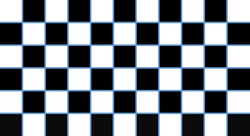

11 * 6 * 5

Number of black squares = 31

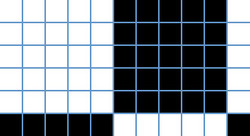

In [ ]:
import numpy as np

def count_checkerboard(h,w,r):

    return ((h//r)//2)*r*w+ r*(h%r)*((w//r)//2)+ (h%r)*(w%r) * ((w//r)%2) if (h//r)%2==0 else ((h//r)//2)*r*w + r*r*((w//r)//2) + (h%r)*((w//r)//2+(w//r)%2)*r + r*(w%r)*((w//r)%2)+(h%r)*(w%r)*((w//r+1)%2)

# More exhaustive version 
def count_checkerboard(h,w,r):
    x=0 
    if (h//r)%2==1  and (w//r)%2==1 :
        x=((h//r)//2)*r*w + r*r*((w//r)//2)+ r*(w%r) +(h%r)*((w//r)//2 + 1)*r 
    if (h//r)%2==1  and (w//r)%2==0 :
        x=((h//r)//2)*r*w + r*r*((w//r)//2) + (h%r)*((w//r)//2)*r + (h%r)*(w%r) 

    if (h//r)%2==0  and (w//r)%2==1 :
        x=((h//r)//2)*r*w+ r*(h%r)*((w//r)//2)+ (h%r)*(w%r)
    if (h//r)%2==0  and (w//r)%2==0 :
        x=((h//r)//2)*r*w+ r*(h%r)*((w//r)//2)
    return x

In [ ]:
#@title Sample Tests { vertical-output: true, display-mode: "form" }

def tests():
    @test.it("Small examples")
    def small_ex():
        # From the description
        test.assert_equals(count_checkerboard(11, 6, 1), 33)
        test.assert_equals(count_checkerboard(11, 6, 2), 32)
        test.assert_equals(count_checkerboard(11, 6, 5), 31)
        
        # More basic examples
        test.assert_equals(count_checkerboard(9, 5, 2), 22)
        test.assert_equals(count_checkerboard(9, 5, 4), 21)
        test.assert_equals(count_checkerboard(9, 5, 8), 5)
        
    @test.it("Larger examples")
    def larger_ex():
        test.assert_equals(count_checkerboard(123456, 7654321, 333), 472485924597)
        test.assert_equals(count_checkerboard(10**10, 10, 20), 5*10**10)
        test.assert_equals(count_checkerboard(10**10, 11, 21), 54999999978)
        test.assert_equals(count_checkerboard(8**5, 7**9, 124), 661153496464)

    @test.it("Some edge cases?")
    def edge_cases():
        test.assert_equals(count_checkerboard(0, 123, 1), 0)
        test.assert_equals(count_checkerboard(445, 998, 101010), 0)
        test.assert_equals(count_checkerboard(0, 0, 1), 0)
tests()